In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("figures.mplstyle")

B_Earth = 25e-6 # T
m_muon = 0.1056 # GeV
e = 1.602e-19 # Coulombs per mu
c = 3e8 # m/s
kg_to_GeV = 5.61e26


## Lorentz force

$F = q \vec{v} \times \vec{B}$

assume $\vec{v} \equiv v \hat{z}$ and $\vec{B} \equiv B \hat{x}$

Note $v = \beta c = (pc/E) c = (\sqrt{E^2 - (mc^2)^2}/E)c= \sqrt{1 - (mc^2/E)^2} c$

Acceleration: $a = F/m = qvB/m = q B c^3 \sqrt{(mc^2)^{-2} - (E)^{-2}}$

In [2]:
def LorentzAcceleration(E_muon):
    v = np.sqrt(1-(m_muon/E_muon)**2)*c # m/s
    a = e*v*B_Earth/(m_muon/kg_to_GeV) # Coulombs m/s A / kg = m/s^2
    return a

def BendingRadius(E_muon):
    p_muon = np.sqrt(E_muon**2 - m_muon**2)
    return p_muon / (0.3 * B_Earth) # eq 11.5 grupen
    
def LorentzDeflection(E_muon,dz):
    vz = np.sqrt(1-(m_muon/E_muon)**2)*c # m/s
    dt = dz/vz
    a = LorentzAcceleration(E_muon)
    print(a/1e12)
    dx = 1./2. * a * dt**2
    return dx

def DeflectionAngle(E_muon,dz):
    return np.arcsin(dz/BendingRadius(E_muon))

def VerticalDeflection(E_muon,dz):
    theta = DeflectionAngle(E_muon,dz)
    rho = BendingRadius(E_muon)
    return rho*(1-np.cos(theta))
    

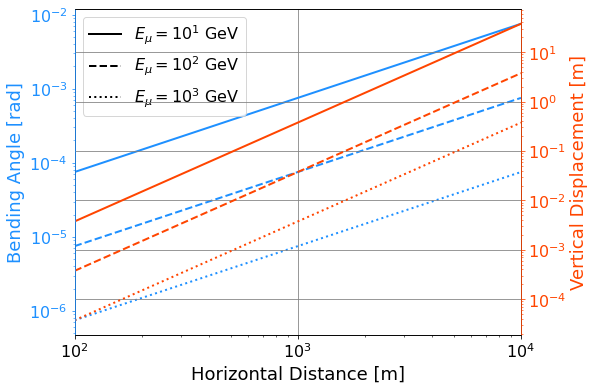

In [3]:
dzrange = np.logspace(2,4,100)
Energies = [1e1,1e2,1e3]
ls_list = ["-","--",":"]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

for E_muon,ls in zip(Energies,ls_list):
    ax1.plot(dzrange,DeflectionAngle(E_muon,dzrange),ls=ls,color="dodgerblue")
    ax1.plot([],[],color="black",ls=ls,label=r"$E_\mu=10^%d$ GeV"%np.log10(E_muon))

for E_muon,ls in zip(Energies,ls_list):
    ax2.plot(dzrange,VerticalDeflection(E_muon,dzrange),ls=ls,color="orangered")

ax1.set_xlim(dzrange[0],dzrange[-1])
ax1.loglog()
ax2.loglog()
ax1.legend()

ax1.set_xlabel('Horizontal Distance [m]')
ax2.spines['left'].set_color('dodgerblue')
ax2.spines['right'].set_color('orangered')
ax1.tick_params(axis='y',colors='dodgerblue',which='both')
ax2.tick_params(colors='orangered',which='both')
ax1.set_axisbelow(True)
ax2.set_axisbelow(True)
ax1.grid(color="grey",axis="x")
ax2.grid(color="grey")
ax1.set_ylabel('Bending Angle [rad]', color='dodgerblue')
ax2.set_ylabel('Vertical Displacement [m]', color='orangered')

plt.show()